In [ ]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define directories for training and testing datasets
train_dir = "E:/dogs_vs_cats/train/"
test_dir = "E:/dogs_vs_cats/test/"


In [ ]:
# Import additional necessary libraries from Keras
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
# Load training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256),
)

Found 20000 files belonging to 2 classes.


In [ ]:
# Load validation dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory = test_dir,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256),
)

Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize the images

def process(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Create the CNN model

In [ ]:
# Define the CNN model architecture
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Display the model's architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_ds, validation_data = validation_ds, epochs = 10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 226s 362ms/step - accuracy: 0.6528 - loss: 0.6247 - val_accuracy: 0.7562 - val_loss: 0.5094
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 224s 358ms/step - accuracy: 0.7663 - loss: 0.4863 - val_accuracy: 0.7750 - val_loss: 0.4731
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 224s 358ms/step - accuracy: 0.8326 - loss: 0.3736 - val_accuracy: 0.7750 - val_loss: 0.5457
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 225s 359ms/step - accuracy: 0.9006 - loss: 0.2285 - val_accuracy: 0.7482 - val_loss: 0.8582
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 224s 358ms/step - accuracy: 0.9543 - loss: 0.1216 - val_accuracy: 0.7570 - val_loss: 0.9904
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 228s 365ms/step - accuracy: 0.9739 - loss: 0.0752 - val_accuracy: 0.7576 - val_loss: 1.2020
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 229s 367ms/step - accuracy: 0.9794 - loss: 0.0625 - val_accuracy: 0.7534 - val_loss: 1.1406
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 224s 357ms/step - accuracy: 0.9853 -

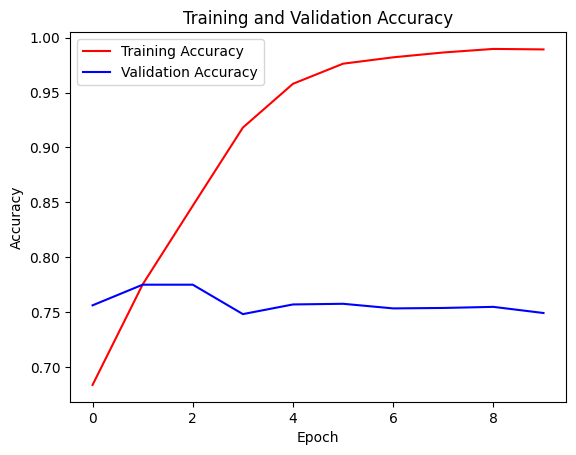

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

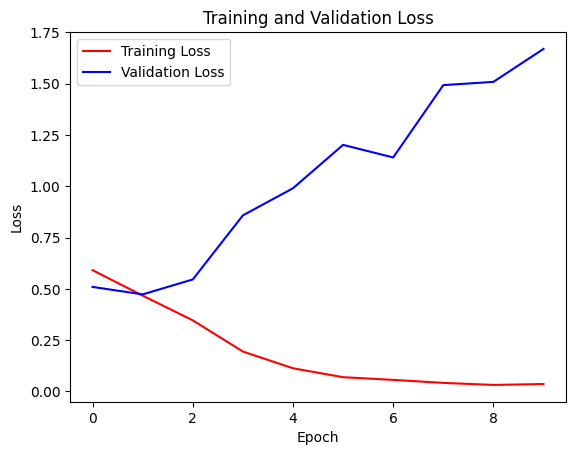

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], color = 'red', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
# Ways to reduce overfitting

# 1. Add more data
# 2. Data Augmentation
# 3. L1/L2 Regularization
# 4. Dropout
# 5. Batch Norm
# 6. Reduce model complexity